In [74]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 8)

In [2]:
# http://download.bls.gov/pub/time.series/sm/sm.data.1.AllData
all_data = pd.read_csv('/Users/jason/data/bls/sm.data.1.AllData.tsv', sep='\t', low_memory=False, index_col=0)

In [15]:
state_codes = pd.read_csv('http://download.bls.gov/pub/time.series/sm/sm.state', 
                          names=('state_code', 'state_name'), usecols=(0,1),
                         sep='\t', header=0, index_col=0)
state_codes = state_codes.to_dict()['state_name']

In [18]:
area_codes = pd.read_csv('http://download.bls.gov/pub/time.series/sm/sm.area', 
                          names=('area_code', 'area_name'), usecols=(0,1),
                         sep='\t', header=0, index_col=0).to_dict()['area_name']

In [19]:
industry_codes = pd.read_csv('http://download.bls.gov/pub/time.series/sm/sm.industry', 
                          names=('industry_code', 'industry_name'), usecols=(0,1),
                         sep='\t', header=0, index_col=0).to_dict()['industry_name']

In [20]:
data_type_codes = pd.read_csv('http://download.bls.gov/pub/time.series/sm/sm.data_type', 
                              names=('data_type_code', 'data_type_name'), usecols=(0,1),
                              sep='\t', header=0, index_col=0).to_dict()['data_type_name']

In [7]:
def series_id_to_adjustment(series_id):
    code = series_id[2]
    if code == 'S':
        return True
    elif code == 'U':
        return False

In [16]:
def series_id_to_state(series_id):
    return state_codes[int(series_id[3:5])]

In [21]:
def series_id_to_area(series_id):
    return area_codes[int(series_id[5:10])]

In [22]:
def series_id_to_industry(series_id):
    return industry_codes[int(series_id[10:18])]

In [23]:
def series_id_to_data_type(series_id):
    return data_type_codes[int(series_id[18:20])]

In [17]:
all_data['state'] = all_data.index.map(series_id_to_state)

In [24]:
all_data['area'] = all_data.index.map(series_id_to_area)

In [25]:
all_data['industry'] = all_data.index.map(series_id_to_industry)

In [26]:
all_data['seasonally_adjusted'] = all_data.index.map(series_id_to_adjustment)

In [27]:
all_data['data_type'] = all_data.index.map(series_id_to_data_type)

In [28]:
all_data.head()

,year,period,value,footnote_codes,state,area,industry,seasonally_adjusted,data_type
series_id,,,,,,,,,
SMS01000000000000001,1990,M01,1623.1,,Alabama,Statewide,Total Nonfarm,True,"All Employees, In Thousands"
SMS01000000000000001,1990,M02,1621.3,,Alabama,Statewide,Total Nonfarm,True,"All Employees, In Thousands"
SMS01000000000000001,1990,M03,1620.6,,Alabama,Statewide,Total Nonfarm,True,"All Employees, In Thousands"
SMS01000000000000001,1990,M04,1634.0,,Alabama,Statewide,Total Nonfarm,True,"All Employees, In Thousands"
SMS01000000000000001,1990,M05,1639.8,,Alabama,Statewide,Total Nonfarm,True,"All Employees, In Thousands"


In [37]:
all_data.query('state == "California" & area == "Statewide" & data_type == "All Employees, In Thousands"').index.value_counts()

SMU06000000000000001              998
SMU06000004142310001              335
SMU06000004322110001              335
SMU06000004348830001              335
SMU06000004244700001              335
SMU06000007072259001              335
SMU06000004244110001              335
SMU06000005553230001              335
SMU06000005051210001              335
SMU06000004245110001              335
SMU06000007071320001              335
SMU06000009091911001              335
SMU06000008081100001              335
SMU06000006562330001              335
SMU06000006056160001              335
SMU06000005051900001              335
SMU06000006562110001              335
SMU06000007072000001              335
SMU06000003133350001              335
SMU06000004340008901              335
SMU06000003133410001              335
SMU06000003133640001              335
SMU06000005552420001              335
SMU06000005553000001              335
SMU06000003133450001              335
SMU06000006562130001              335
SMU060000060

In [38]:
test = all_data.head(10).copy()

In [40]:
all_data.period.value_counts()

M10    538214
M04    538211
M09    538202
M08    538202
M07    538202
M06    538202
M05    538199
M01    537753
M03    537753
M02    537753
M12    514748
M11    514748
M13    454108
dtype: int64

In [41]:
def period_to_period_type(p):
    if p == 'M13':
        return 'yearly'
    return 'monthly'

In [42]:
all_data['period_type'] = all_data.period.apply(period_to_period_type)

In [55]:
def row_to_date(row):
    if row.period_type == 'yearly':
        return str(row.year)
    return '%s-%s' % (row.year, row.period[1:])

In [59]:
#test['period_type'] = test.period.apply(period_to_period_type)
all_data['date'] = all_data.apply(row_to_date, axis=1)

In [67]:
all_data.index = all_data.index.map(lambda x: x.strip())

In [72]:
df = all_data.ix['SMU06000000000000001'].query('period_type == "monthly"')[['date', 'value']]

In [73]:
df.head(5)

,date,value
SMU06000000000000001,1939-01,1700.7
SMU06000000000000001,1939-02,1709.4
SMU06000000000000001,1939-03,1731.2
SMU06000000000000001,1939-04,1772.8
SMU06000000000000001,1939-05,1797.9


In [83]:
df.set_index('date', inplace=True)
df = pd.DataFrame(df.value.astype(float))

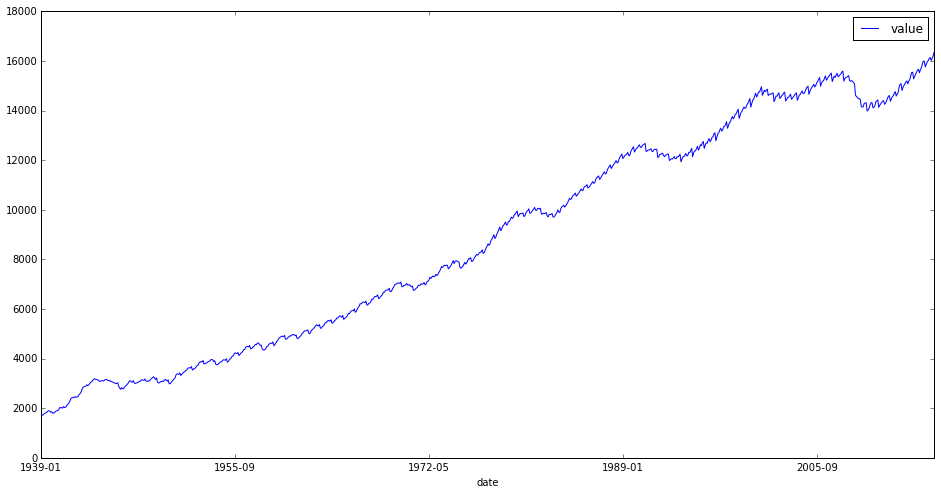

In [84]:
df.plot()

In [86]:
all_data.ix['SMU06000000000000001'].head(1)

,year,period,value,footnote_codes,state,area,industry,seasonally_adjusted,data_type,period_type,date
SMU06000000000000001,1939,M01,1700.7,,California,Statewide,Total Nonfarm,False,"All Employees, In Thousands",monthly,1939-01


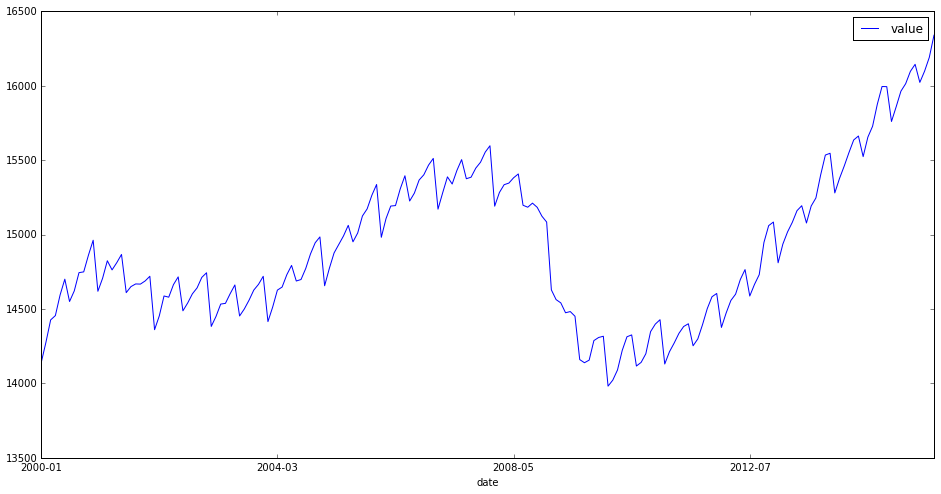

In [91]:
df['2000':].plot()

In [104]:
df = all_data.query('industry == "Restaurants" & area == "Los Angeles-Long Beach-Anaheim, CA" '
                    '& period_type == "monthly"')[['date', 'value']].copy()

In [105]:
df.set_index('date', inplace=True)
df = pd.DataFrame(df.value.astype(float))

In [109]:
df.tail()

,value
date,
2015-06,460.3
2015-07,461.4
2015-08,461.8
2015-09,462.7
2015-10,463.9


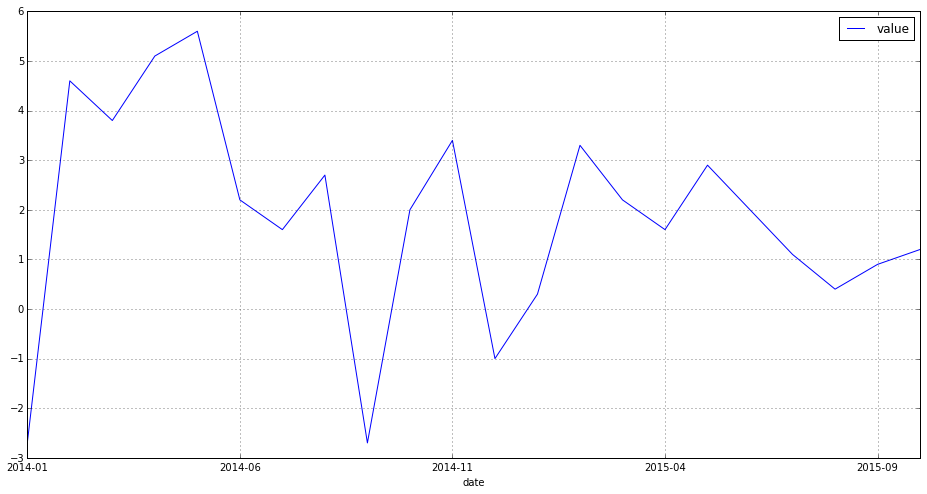

In [115]:
(df - df.shift(1))['2014':].plot(grid=True)